In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from plotting_tools import * 

In [2]:
experiment_series ="pop8"
precipitation_setting = "Rain"
decay_setting = "decay"

plot_path = f"../plots/{experiment_series}/concentration"
os.makedirs(plot_path, exist_ok=True)

In [3]:
result_path = f"../../preprocessing/preprocessed_data/{experiment_series}"

precipitation_setting = "Rain"
decay_setting = "decay"
df_Rain_decay = pd.read_csv(f"{result_path}/substances/{decay_setting}_{precipitation_setting}_output_scaled.csv")
df_Rain_decay = df_Rain_decay[(df_Rain_decay["variable"] == "COV19") & (df_Rain_decay["manhole"].isin(manhole_names.keys()))]
df_Rain_decay["location"] = df_Rain_decay["manhole"].map(manhole_names)
df_Rain_decay = df_Rain_decay.loc[df_Rain_decay["location"].isin(["N_Ua", "N_D"])]

precipitation_setting = "Rain"
decay_setting = "no_decay"
df_Rain_no_decay = pd.read_csv(f"{result_path}/substances/{decay_setting}_{precipitation_setting}_output_scaled.csv")
df_Rain_no_decay = df_Rain_no_decay[(df_Rain_no_decay["variable"] == "COV19") & (df_Rain_no_decay["manhole"].isin(manhole_names.keys()))]
df_Rain_no_decay["location"] = df_Rain_no_decay["manhole"].map(manhole_names)
df_Rain_no_decay = df_Rain_no_decay.loc[df_Rain_no_decay["location"].isin(["N_Ua", "N_D"])]

precipitation_setting = "noRain"
decay_setting = "no_decay"
df_noRain_no_decay = pd.read_csv(f"{result_path}/substances/{decay_setting}_{precipitation_setting}_output_scaled.csv")
df_noRain_no_decay = df_noRain_no_decay[(df_noRain_no_decay["variable"] == "COV19") & (df_noRain_no_decay["manhole"].isin(manhole_names.keys()))]
df_noRain_no_decay["location"] = df_noRain_no_decay["manhole"].map(manhole_names)
df_noRain_no_decay = df_noRain_no_decay.loc[df_noRain_no_decay["location"].isin(["N_Ua", "N_D"])]

In [4]:
df_Rain_decay["Date"] = pd.to_datetime(start_date) + pd.to_timedelta(df_Rain_decay["time_in_minutes"], unit="min")
df_Rain_no_decay["Date"] = pd.to_datetime(start_date) + pd.to_timedelta(df_Rain_no_decay["time_in_minutes"], unit="min")
df_noRain_no_decay["Date"] = pd.to_datetime(start_date) + pd.to_timedelta(df_noRain_no_decay["time_in_minutes"], unit="min")

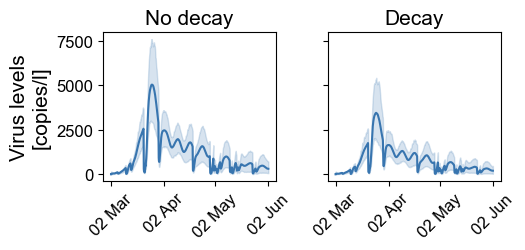

In [8]:
# Set up 4x2 subplots
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(5.5,2.76), sharex=True)
axes = axes.flatten()



df_plot = df_Rain_no_decay.loc[df_Rain_no_decay["location"] == "N_D"]
sns.lineplot(data=df_plot, x="Date", y="value", color=blue, ax=axes[0], estimator=np.mean, errorbar=("pi", 90))
axes[0].set_title("No decay")
axes[0].set_ylabel("Virus levels\n[copies/l]")
axes[0].set_xlabel("")

df_plot = df_Rain_decay.loc[df_Rain_decay["location"] == "N_D"]
sns.lineplot(data=df_plot, x="Date", y="value", color=blue, ax=axes[1], estimator=np.mean, errorbar=("pi", 90))
axes[1].set_title("Decay")
axes[1].set_ylabel("Virus levels\n[copies/l]")
axes[1].set_xlabel("")

# locator that places a tick on day=2 of every month
second_of_month = mdates.DayLocator(bymonthday=2)

for ax in axes:
    ax.xaxis.set_major_locator(second_of_month)
    for lbl in ax.get_xticklabels():
        lbl.set_rotation(45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d %b"))  # Format without year

# Add overall title
plt.tight_layout()
fig.savefig(f"../plots/{experiment_series}/concentration/decay_comparison_N_D_COV19.png", dpi=300)
plt.show()
